### **The Main Focus of this Notebook is to learn how to use Recurrent Neural Network (RNN) to predict weather the Email is Spam or not.**

The Dataset is taken from Kaggle-Dataset. The Dataset is available at https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset

The RNN is the most powerful type of Neural Network. It is used to predict the future values based on the previous values.


The tensorflow version used in this notebook is 2.3.0



## Table of Content:

1. Importing the libraries and dataset
2. Data Preprocessing and Feature Engineering
3. Building the RNN
4. Making the predictions and visualising the results



## 1. Importing the libraries and dataset

In [1]:

# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import json
import pickle
import joblib

In [3]:
# We are using the Keras library to build our RNN model


import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential

# import pad sequence
from keras_preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.text import Tokenizer

from keras.layers import Embedding

# importing callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
data=pd.read_csv("Resources/prepared_data1.csv")
data.fillna('',inplace=True)
data.head()


,Body,Label
0,save life insurance spend life quote saving en...,1
1,fight risk cancer http www adclick w p cfm pk ...,1
2,fight risk cancer http www adclick w p cfm pk ...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guaranteed lose lb day...,1


## 2. Data Preprocessing and Feature Engineering

In [5]:
texts=list(data['Body'])
labels=list(data['Label'].astype(bool))


print(len(texts),len(labels))

5293 5293


In [6]:
print("No. of 0 labels:",labels.count(0))
print("No. of 1 labels:",labels.count(1))

No. of 0 labels: 3915
No. of 1 labels: 1378


## Tokenization
Tokenization is the process of breaking down the text into smaller units called tokens. The tokens can be words, sentences, or even characters. The tokens are the basic building blocks of the text. The text is converted into tokens and then the tokens are converted into numbers. The numbers are then used to train the model.



In [7]:
# Maximal length of the text
maxlen=100

# Maximal number of words to be used
max_words=10000

# instantiate tokenizer
tokenizer = Tokenizer()

# fit tokenizer on text
tokenizer.fit_on_texts(texts)

# create sequences
sequences = tokenizer.texts_to_sequences(texts)

# create word index
word_index = tokenizer.word_index

# create reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


print('Found %s unique tokens.' % len(word_index))


Found 61499 unique tokens.


In [8]:

# pad sequences
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


# split data into training and testing
split = int(0.8 * len(texts))


# shuffle data
indices = np.arange(padded.shape[0])
np.random.shuffle(indices)
padded = padded[indices]

labels = np.asarray(labels)
labels = labels[indices]

# split data into training and testing

train_sequences = padded[:split]
test_sequences = padded[split:]

train_labels = np.asarray(labels[:split])
test_labels = np.asarray(labels[split:])



print('Shape of training data tensor:', train_sequences.shape)
print('Shape of training label tensor:', train_labels.shape)
print('Shape of testing data tensor:', test_sequences.shape)
print('Shape of testing label tensor:', test_labels.shape)



Shape of training data tensor: (4234, 100)
Shape of training label tensor: (4234,)
Shape of testing data tensor: (1059, 100)
Shape of testing label tensor: (1059,)


## 3. Building the RNN

RNN is the most powerful type of Neural Network. It is used to predict the future values based on the previous values. We are using the LSTM (Long Short Term Memory) RNN to predict the Spam or not Spam. The LSTM is the most powerful type of RNN. It is used to predict the future values based on the previous values. It is used in many applications like Stock Market Prediction, Weather Prediction, etc.



In [10]:

# parameters

vocab_size = len(word_index) + 1
embedding_dim = 32

# create model

# instantiate model
model = Sequential()


# add embedding layer
model.add(Embedding(vocab_size, embedding_dim))

# add LSTM layer
model.add(LSTM(32))

# add dense layer
model.add(Dense(1, activation='sigmoid'))

# model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          1968000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,976,353
Trainable params: 1,976,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Adding early stop callback to stop training when validation loss is not decreasing

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# fit model

history = model.fit(train_sequences, train_labels,
        epochs=10, 
        validation_data=(test_sequences, test_labels), 
        verbose=2,
        batch_size=64,
        callbacks=[early_stop]
        )

Epoch 1/10
67/67 - 6s - loss: 0.5750 - accuracy: 0.7430 - val_loss: 0.4326 - val_accuracy: 0.7630 - 6s/epoch - 84ms/step
Epoch 2/10
67/67 - 3s - loss: 0.1840 - accuracy: 0.9443 - val_loss: 0.1716 - val_accuracy: 0.9603 - 3s/epoch - 50ms/step
Epoch 3/10
67/67 - 3s - loss: 0.0920 - accuracy: 0.9795 - val_loss: 0.2117 - val_accuracy: 0.9518 - 3s/epoch - 52ms/step
Epoch 4/10
67/67 - 3s - loss: 0.1901 - accuracy: 0.9431 - val_loss: 0.2166 - val_accuracy: 0.9311 - 3s/epoch - 50ms/step
Epoch 5/10
67/67 - 4s - loss: 0.1169 - accuracy: 0.9667 - val_loss: 0.1848 - val_accuracy: 0.9651 - 4s/epoch - 55ms/step
Epoch 6/10
67/67 - 3s - loss: 0.1242 - accuracy: 0.9823 - val_loss: 0.2162 - val_accuracy: 0.9509 - 3s/epoch - 52ms/step
Epoch 7/10
67/67 - 4s - loss: 0.0847 - accuracy: 0.9865 - val_loss: 0.1922 - val_accuracy: 0.9547 - 4s/epoch - 56ms/step
Epoch 7: early stopping


## 4. Making the predictions and visualising the results

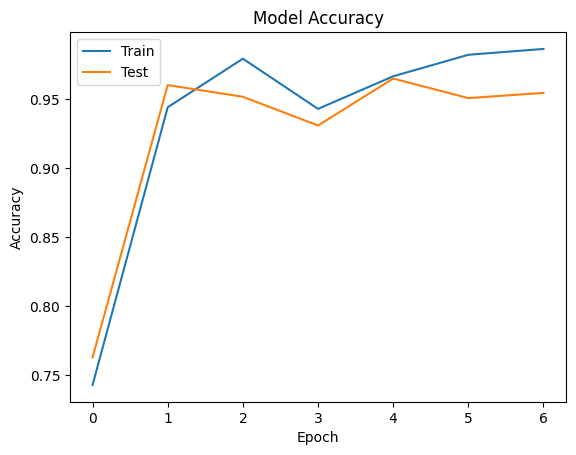

In [13]:


# plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





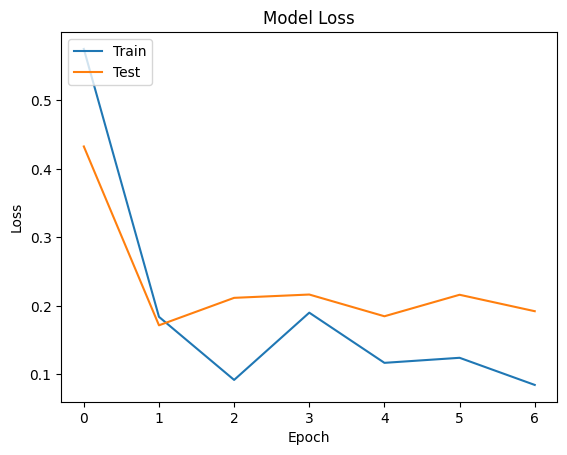

In [14]:
# plot training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [15]:

# evaluate model
loss, accuracy = model.evaluate(test_sequences, test_labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

# make predictions
predictions = model.predict(test_sequences)

# print predictions
print(predictions[:10])

# print actual values
print(test_labels[:10])



Accuracy: 95.467424
34/34 [==============================] - 1s 10ms/step
[[0.00618857]
 [0.00587896]
 [0.00611254]
 [0.00685942]
 [0.8750595 ]
 [0.92290974]
 [0.00646979]
 [0.00590909]
 [0.00591624]
 [0.0059245 ]]
[False False False False  True  True False False False  True]


In [16]:

# print confusion matrix
cm = confusion_matrix(test_labels, predictions.round())
print(cm)


[[744  20]
 [ 28 267]]


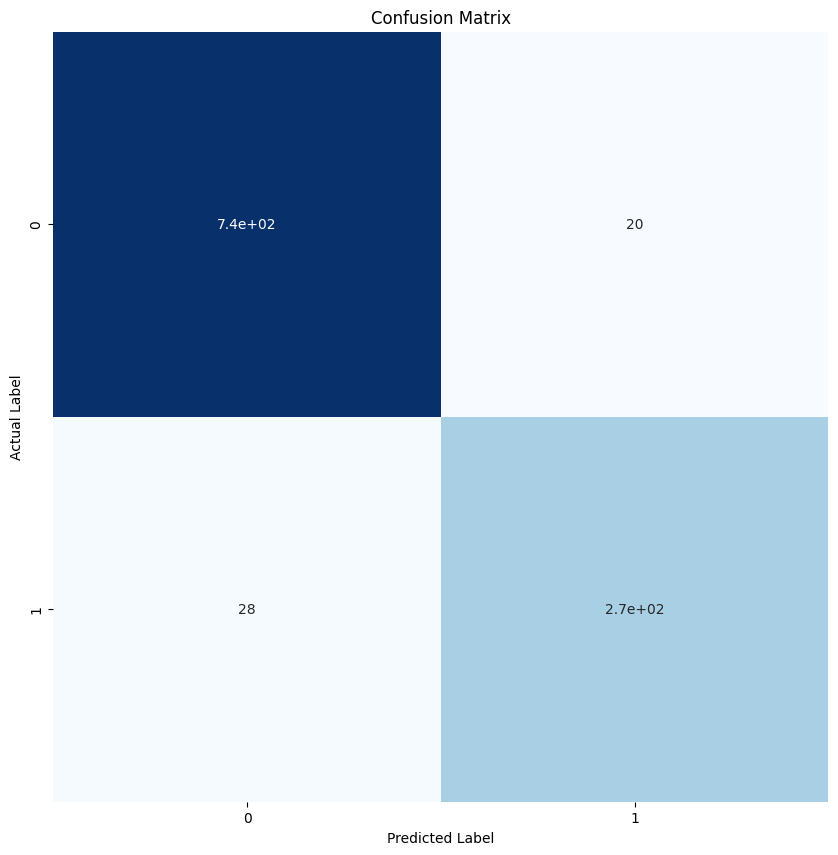

In [17]:
# plotting Confusion Matrix 


plt.figure(figsize=(10,10))
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('Resources/confusion_matrix_RNN.png',dpi=400,bbox_inches='tight')



In [18]:
# print classification report
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       764
        True       0.93      0.91      0.92       295

    accuracy                           0.95      1059
   macro avg       0.95      0.94      0.94      1059
weighted avg       0.95      0.95      0.95      1059



In [19]:
# Saving the model

model.save("Resources/RNN_model.h5")

# Saving the tokenizer

with open('Resources/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the word index

with open('Resources/word_index.json', 'w') as fp:
    json.dump(word_index, fp)

# Saving the reverse word index

with open('Resources/reverse_word_index.json', 'w') as fp:
    json.dump(reverse_word_index, fp)


# saving  all the parameters in json

params=dict()

params['maxlen']=maxlen
params['vocab size']=vocab_size

with open('Resources/parameters.json','w') as fp:
    json.dump(params,fp)